In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [3]:
df = pd.read_csv("SMSSpamCollection", sep="\t", names=['label', 'text'])

In [4]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#We arounf 5500+ data-points
#So we treat one example as a datapoint
df.shape

(5572, 2)

In [6]:
for i in range(10):
  print(df.iloc[i, -1])
  print()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

U dun say so early hor... U c already then say...

Nah I don't think he goes to usf, he lives around here though

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

Even my brother is not like to speak with me. They treat me like aids patent.

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more? U

In [9]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
#Data Cleaning
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [10]:
sn = SnowballStemmer('english')
stop = set(stopwords.words('english'))

In [11]:
def clean_text(sms):
  sms = sms.lower()
  sms = re.sub("[^a-z0-9]", ' ', sms) #If any character is not between A to Z
  sms = nltk.word_tokenize(sms) #WORD TOKENIZER
  sms = [t for t in sms if len(t) > 1]
  sms = [word for word in sms if word not in stop]
  sms = [sn.stem(word) for word in sms]
  sms = ' '.join(sms)
  return sms

In [12]:
clean_text("Get is... are... playing they... UNLIMITED played <!!!>,,,??? Free data play 100GB... at Rs.0")

'get play unlimit play free data play 100gb rs'

In [13]:
df['clean_text'] = df['text'].apply(clean_text)

In [14]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [37]:
# ----------> WordCloud <---------- #
# WordCloud is used for visualization or representation of different text data.

In [15]:
from wordcloud import WordCloud

In [19]:
hamdata = df[df['label'] == 'ham']
hamdata = hamdata['clean_text'].values #In np arrays

In [20]:
hamdata

array(['go jurong point crazi avail bugi great world la buffet cine got amor wat',
       'ok lar joke wif oni', 'dun say earli hor alreadi say', ...,
       'piti mood suggest',
       'guy bitch act like interest buy someth els next week gave us free',
       'rofl true name'], dtype=object)

In [32]:
def wordCloud(data):
  words = ' '.join(data)
  wc = WordCloud(background_color='white')
  wc = wc.generate(words)

  plt.figure(figsize=(10, 10))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.show()

HamData Words


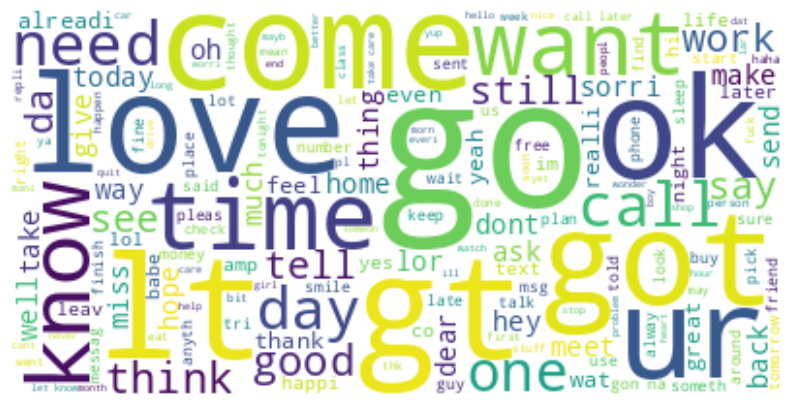

In [34]:
print("HamData Words")
wordCloud(hamdata)

In [35]:
spamdata = df[df['label'] == 'spam']
spamdata = spamdata['clean_text'].values #In np arrays

SpamData Words


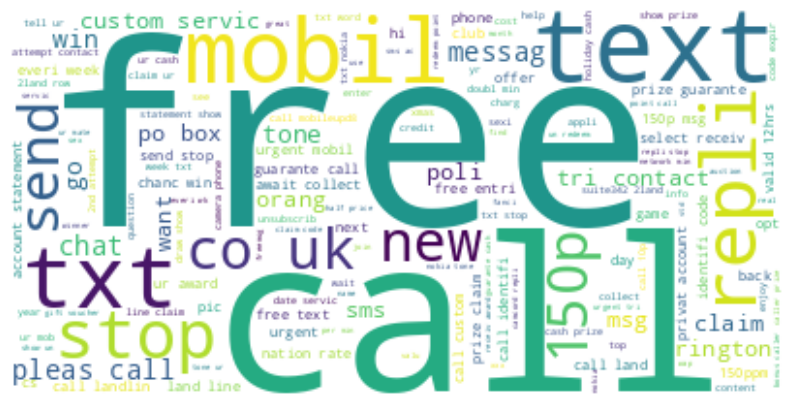

In [36]:
print("SpamData Words")
wordCloud(spamdata)

In [38]:
#Text Featurization

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
cv = CountVectorizer()

In [44]:
cv.fit_transform(df['clean_text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 47175 stored elements and shape (5572, 7242)>

In [49]:
cv = CountVectorizer(max_features=5000)

In [51]:
X = cv.fit_transform(df['clean_text']).toarray()

In [52]:
X.shape

(5572, 5000)

In [58]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [85]:
a = pd.get_dummies(df['label'])
a = a.astype(int)
print(a)

      ham  spam
0       1     0
1       1     0
2       0     1
3       1     0
4       1     0
...   ...   ...
5567    0     1
5568    1     0
5569    1     0
5570    1     0
5571    1     0

[5572 rows x 2 columns]


In [84]:
y = pd.get_dummies(df['label'])
y = y['spam'].values

In [76]:
y = pd.get_dummies(df['label'])
y = y['spam'].values
y = y.astype(int)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
from sklearn.naive_bayes import MultinomialNB

In [80]:
model = MultinomialNB()

In [81]:
model.fit(X_train, y_train)

MultinomialNB()

In [82]:
y_pred = model.predict(X_test)

In [86]:
y_test, y_pred

(array([0, 1, 0, ..., 0, 1, 0]), array([0, 1, 0, ..., 0, 1, 0]))

In [87]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
1110,0,0
1111,0,0
1112,0,0
1113,1,1


In [88]:
# Evaluation

In [89]:
print("Accuracy of Training Data: ")
print(model.score(X_train, y_train))

Accuracy of Training Data: 
0.9914740857078752


In [90]:
print("Accuracy of Testing Data: ")
print(model.score(X_test, y_test))

Accuracy of Testing Data: 
0.9874439461883409


In [91]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [94]:
confusion_matrix(y_test, y_pred)
# Total Data we 955 (for Non-Spam) out of which 948 data are classified as Non-Spam. There are seven mistake the model is making write now.
# Total Data we 160 (for Spam) out of which 153 data are classified as Spam. There are seven mistake the model is making write now.

array([[948,   7],
       [  7, 153]])

In [93]:
y_test.shape

(1115,)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.96      0.96      0.96       160

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [96]:
f1_score(y_test, y_pred)

0.95625